# Two-link Planar Manipulator Free Fall

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


#system parameters
m1, m2= 1, 2
l1, l2= 2, 1
lc1, lc2= 1, 0.5
I1, I2 = 0.33, 0.1667
g=9.81
t=np.linspace(0, 40, 1001)

#ode solver
def dSdt(S, t):
    q1,dq1dt,q2,dq2dt=S
    dqdt=np.array([[dq1dt], [dq2dt]])
    M=np.array([[(m2*((l1**2)+(lc2**2)+(2*l1*lc2*np.cos(q2)))+m1*(lc1**2)+I1+I2), (m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)], [(m2*(l1*lc2*np.cos(q2)+lc2**2)+I2), (m2*(lc2**2)+I2)]])
    M_i=np.linalg.inv(M)
    C=np.array([[(-2*m2*l1*lc2*np.sin(q2)*dq2dt), (-m2*l1*lc2*np.sin(q2)*dq2dt)], [(m2*l1*lc2*np.sin(q2)*dq1dt), 0]])
    G=np.array([[(m1*g*lc1*np.cos(q1))+(m2*g*l1*np.cos(q1))+(m2*g*lc2*np.cos(q1+q2))], [(m2*g*lc2*np.cos(q1+q2))]])
    ddqdt=np.matmul(M_i, -(np.matmul(C, dqdt)+G))
    #ddq1dt=(-(m2*(lc2**2)+I2)*((-2*m2*l1*lc2*np.sin(q2)*dq2dt)*dq1dt+(-m2*l1*lc2*np.sin(q2)*dq2dt)*dq2dt+(m1*g*lc1*np.cos(q1))+(m2*g*l1*np.cos(q1))+(m2*g*lc2*np.cos(q1+q2)))+(m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)*((m2*l1*lc2*np.sin(q2)*dq1dt)*dq1dt+(m2*g*lc2*np.cos(q1+q2))))/((m2*((l1**2)+(lc2**2)+(2*l1*lc2*np.cos(q2)))+m1*(lc1**2)+I1+I2)*(m2*(lc2**2)+I2)-((m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)*(m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)))
    #ddq2dt=(-(m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)*((-2*m2*l1*lc2*np.sin(q2)*dq2dt)*dq1dt+(-m2*l1*lc2*np.sin(q2)*dq2dt)*dq2dt+(m1*g*lc1*np.cos(q1))+(m2*g*l1*np.cos(q1))+(m2*g*lc2*np.cos(q1+q2)))+(m2*((l1**2)+(lc2**2)+(2*l1*lc2*np.cos(q2)))+m1*(lc1**2)+I1+I2)*((m2*l1*lc2*np.sin(q2)*dq1dt)*dq1dt+(m2*g*lc2*np.cos(q1+q2))))/((m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)*(m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)-(m2*((l1**2)+(lc2**2)+(2*l1*lc2*np.cos(q2)))+m1*(lc1**2)+I1+I2)*(m2*(lc2**2)+I2))
    return dq1dt, ddqdt[0][0], dq2dt, ddqdt[1][0]
               

y0=[1,0,0.5,0]  #initial conditions
sol=odeint(dSdt,y0=y0,t=t)


#respective solutions
q1=sol.T[0]
q2=sol.T[2]
dq1dt=sol.T[1]
dq2dt=sol.T[3]

## q1 and q2

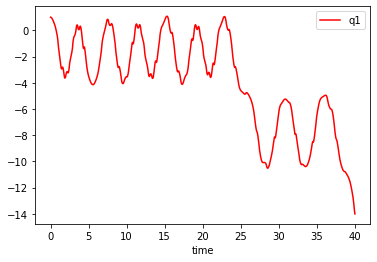

In [2]:
plt.plot(t,q1,"r-",label="q1")

plt.xlabel('time')
plt.legend()
plt.show()

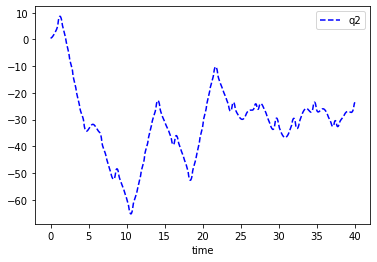

In [3]:
plt.plot(t,q2,"b--",label="q2")

plt.xlabel('time')
plt.legend()
plt.show()

## Energy check

In [4]:
#kinetic energy
K=1/2*(m2*((l1**2)+(lc2**2)+(2*l1*lc2*np.cos(q2)))+m1*(lc1**2)+I1+I2)*(dq1dt**2)+1/2*(m2*(lc2**2)+I2)*dq2dt**2+(m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)*dq1dt*dq2dt
#potential Energy
P=g*(m1*lc1*np.sin(q1)+m2*lc2*np.sin(q1+q2)+m2*l1*np.sin(q1))
#total energy
T=K+P

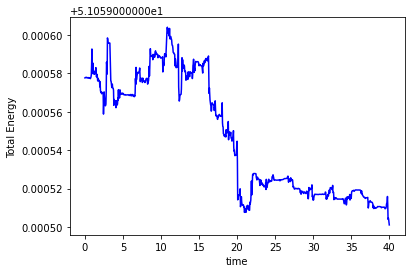

In [5]:
plt.plot(t,T,"b-",label="total energy")
plt.xlabel("time")
plt.ylabel("Total Energy")

plt.show()

In [6]:
T #(total energy)

array([51.05957762, 51.0595778 , 51.05957782, ..., 51.05950379,
       51.05950227, 51.05950104])

## Animation

In [7]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter 

def get_x1y1x2y2(t, q1, q2, l1, l2):
    return (l1*np.cos(q1),
            l1*np.sin(q1),
            l1*np.cos(q1) + l2*np.cos(q1+q2),
            l1*np.sin(q1) + l2*np.sin(q1+q2))

x1, y1, x2, y2 = get_x1y1x2y2(t, sol.T[0], sol.T[2], l1, l2)

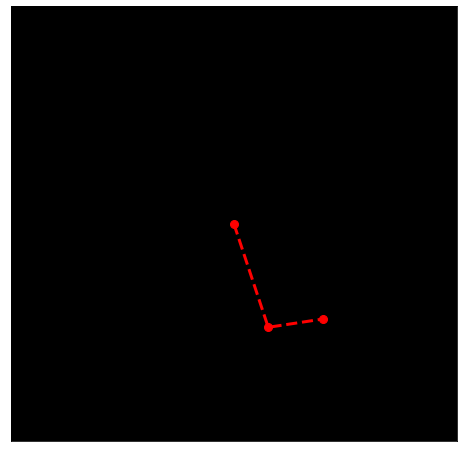

In [8]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)